## Analyse exploratoire et nettoyage de `name.basics`

**Cette table va être utilisée pour les informations qu'elle apporte et non pour le machine learning.**

**A l'issue de l'exploration et du nettoyage, 2 tables seront créées : 1 table `info_acteurs` et 1 table `info-films`

### Introduction
Les étapes suivantes visent à analyser, nettoyer et préparer la table `name.basics` pour une utilisation ultérieure. 
Nous allons examiner chaque colonne, effectuer les transformations nécessaires et proposer des recommandations pour les prochaines étapes.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### Étape 1 : Chargement des données

In [26]:
# Importation du DataSet :
df_name_basics = pd.read_csv('../gitignore/name.basics.tsv', sep= '\t')

#### Aperçu rapide des données

In [27]:
df_name_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13958409 entries, 0 to 13958408
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   nconst             object
 1   primaryName        object
 2   birthYear          object
 3   deathYear          object
 4   primaryProfession  object
 5   knownForTitles     object
dtypes: object(6)
memory usage: 639.0+ MB


### Étape 2 : Exploration et Nettoyage des données

#### Aperçu rapide des données

In [28]:
df_name_basics.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer","tt0050419,tt0072308,tt0053137,tt0027125"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0069467,tt0050976,tt0083922"


#### Identification des valeurs manquantes

In [29]:
df_name_basics.isna().sum()

nconst               0
primaryName          9
birthYear            0
deathYear            0
primaryProfession    0
knownForTitles       0
dtype: int64

In [32]:
manquant_primary_name = df_name_basics[df_name_basics['primaryName'].isna()]

print("Lignes avec des valeurs manquantes dans `primaryName` :")
print(manquant_primary_name)

# Vérification du nombre total de valeurs manquantes
print(f"Nombre total de valeurs manquantes : {manquant_primary_name.shape[0]}")

Lignes avec des valeurs manquantes dans `primaryName` :
             nconst primaryName birthYear deathYear        primaryProfession  \
100967    nm0106021         NaN        \N        \N                    actor   
1786541  nm10927938         NaN        \N        \N  art_department,composer   
4927108  nm14292439         NaN        \N        \N                       \N   
4962416  nm14334668         NaN        \N        \N                 director   
4993716  nm14381073         NaN        \N        \N          director,writer   
5877414  nm15383643         NaN        \N        \N                 composer   
6311127  nm15901107         NaN        \N        \N                    actor   
7029620  nm16712594         NaN        \N        \N           actor,composer   
8387433   nm3177777         NaN        \N        \N                  actress   

                knownForTitles  
100967              tt21610866  
1786541  tt16401648,tt10837972  
4927108                     \N  
4962416    

#### Remplacement des valeurs '\N' par NaN pour faciliter le traitement

In [33]:
df_name_basics = df_name_basics.replace(r'\\N', pd.NA, regex=True)

In [34]:
df_name_basics.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer","tt0050419,tt0072308,tt0053137,tt0027125"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934,<NA>,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0069467,tt0050976,tt0083922"


In [35]:
# Vérifier s'il existe des doublons dans la colonne 'nconst'
doublons = df_name_basics['nconst'].duplicated().sum()

if doublons > 0:
    print(f"Il y a {doublons} doublons dans la colonne 'nconst'.")
else:
    print("Toutes les valeurs de la colonne 'nconst' sont uniques.")

Toutes les valeurs de la colonne 'nconst' sont uniques.


#### Conversion des colonnes `birthYear` et `deathYear` en Date

In [36]:
# Convertir les colonnes birthYear et deathYear en format datetime tout en affichant uniquement l'année
df_name_basics['birthYear'] = pd.to_datetime(df_name_basics['birthYear'], errors='coerce', format='%Y').dt.year
df_name_basics['deathYear'] = pd.to_datetime(df_name_basics['deathYear'], errors='coerce', format='%Y').dt.year
df_name_basics['birthYear'] = df_name_basics['birthYear'].astype('Int64')
df_name_basics['deathYear'] = df_name_basics['deathYear'].astype('Int64')

#### Exportation de la base nettoyée pour name.basics_info_acteurs

- Exportation d'une table `info_acteurs_final` avec toutes les colonnes

In [37]:
df_name_basics.to_csv('../gitignore/name.basics_info_acteurs_final.tsv', sep= '\t', index = False)

- Exportation d'une table `info_films_final` avec toutes les colonnes

In [39]:
#drop des colonnes inutiles pour info_films
df_name_basics_info_film = df_name_basics[['nconst', 'primaryName']]

In [40]:
df_name_basics_info_film.head()

,nconst,primaryName
0,nm0000001,Fred Astaire
1,nm0000002,Lauren Bacall
2,nm0000003,Brigitte Bardot
3,nm0000004,John Belushi
4,nm0000005,Ingmar Bergman


In [44]:
# export final
df_name_basics_info_film.to_csv('../gitignore/name.basics_info_film_final.tsv', sep= '\t', index = False)

### Étape 3 : Analyse Exploratoire, finalisation du nettoyage et recommandations

#### Explode de la colonne `primaryProfession`

- La colonne `primaryProfession` contient des valeurs `string array` qu'il va falloir exploder pour permettre une analyse et une utilisation ultérieure.

In [46]:
df_name_basics['primaryProfession'].value_counts()

primaryProfession
actor                                                   2477780
actress                                                 1590553
miscellaneous                                            809423
producer                                                 479950
camera_department                                        432289
                                                         ...   
stunts,producer,visual_effects                                1
set_decorator,location_management,make_up_department          1
make_up_department,miscellaneous,set_decorator                1
producer,stunts,archive_footage                               1
composer,director,archive_footage                             1
Name: count, Length: 23081, dtype: int64

In [47]:
# Conversion des professions en liste
df_name_basics['primaryProfession'] = df_name_basics['primaryProfession'].apply(
    lambda x: x.split(',') if isinstance(x, str) else []
)

# Explosion des professions
df_exploded_profession = df_name_basics.explode('primaryProfession', ignore_index=True)

In [14]:
df_exploded_profession.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,actor,"tt0050419,tt0072308,tt0053137,tt0027125"
1,nm0000001,Fred Astaire,1899,1987,miscellaneous,"tt0050419,tt0072308,tt0053137,tt0027125"
2,nm0000001,Fred Astaire,1899,1987,producer,"tt0050419,tt0072308,tt0053137,tt0027125"
3,nm0000002,Lauren Bacall,1924,2014,actress,"tt0037382,tt0075213,tt0117057,tt0038355"
4,nm0000002,Lauren Bacall,1924,2014,soundtrack,"tt0037382,tt0075213,tt0117057,tt0038355"


In [48]:
df_exploded_profession['primaryProfession'].value_counts()

primaryProfession
actor                        3231919
actress                      1953835
miscellaneous                1452003
producer                     1240181
writer                        929001
camera_department             824771
director                      758973
art_department                494564
sound_department              404326
cinematographer               403401
editor                        372346
composer                      351795
music_department              288759
assistant_director            269618
visual_effects                250211
make_up_department            235403
animation_department          227679
production_manager            217547
archive_footage               202475
editorial_department          197164
costume_department            164343
soundtrack                    152187
transportation_department     107318
art_director                   97433
stunts                         92614
script_department              91696
location_management 

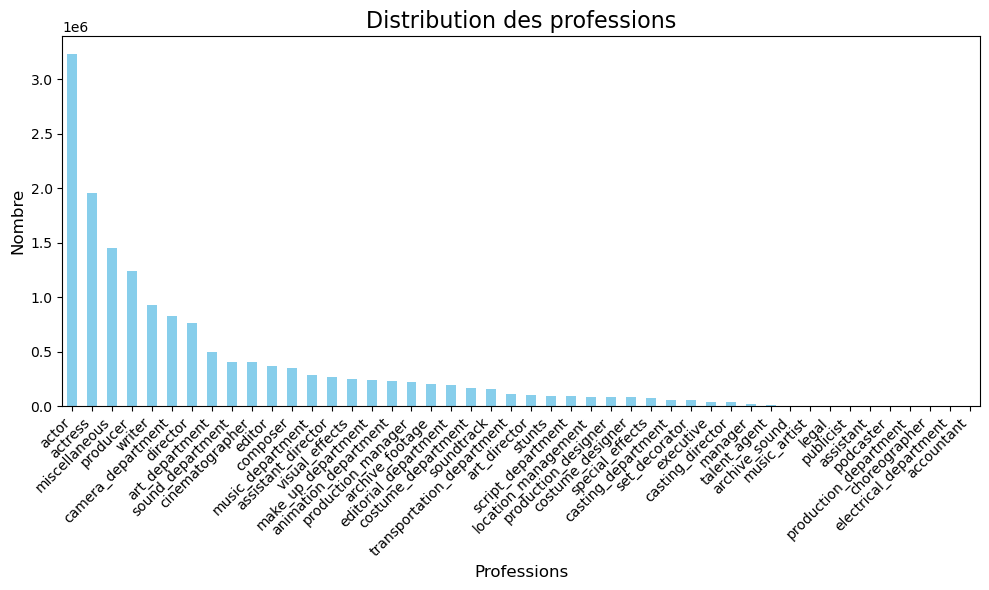

In [49]:
# Obtenir le comptage des professions
profession_counts = df_exploded_profession['primaryProfession'].value_counts()

# Création du graphique en barres
plt.figure(figsize=(10, 6))
profession_counts.plot(kind='bar', color='skyblue')

# Ajouter des titres et labels
plt.title('Distribution des professions', fontsize=16)
plt.xlabel('Professions', fontsize=12)
plt.ylabel('Nombre', fontsize=12)

# Rotation des noms des professions pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right', fontsize=10)

# Afficher le graphique
plt.tight_layout()
plt.show()

**Arbitrage** : Nous allons conserver les valeurs 'actor', 'actress', 'producer', 'writer', 'director' de la colonne 'primaryProfession'     

In [50]:
df_name_basics = df_exploded_profession.copy()

# Liste des professions à conserver
professions = ['actor', 'actress', 'producer', 'writer', 'director']

# Filtrer les lignes où la colonne 'primaryProfession' contient une valeur dans la liste
df_name_basics = df_name_basics[df_name_basics['primaryProfession'].isin(professions)]


#### Analyse graphique

In [51]:
df_name_basics['primaryProfession'].value_counts()

primaryProfession
actor       3231919
actress     1953835
producer    1240181
writer       929001
director     758973
Name: count, dtype: int64

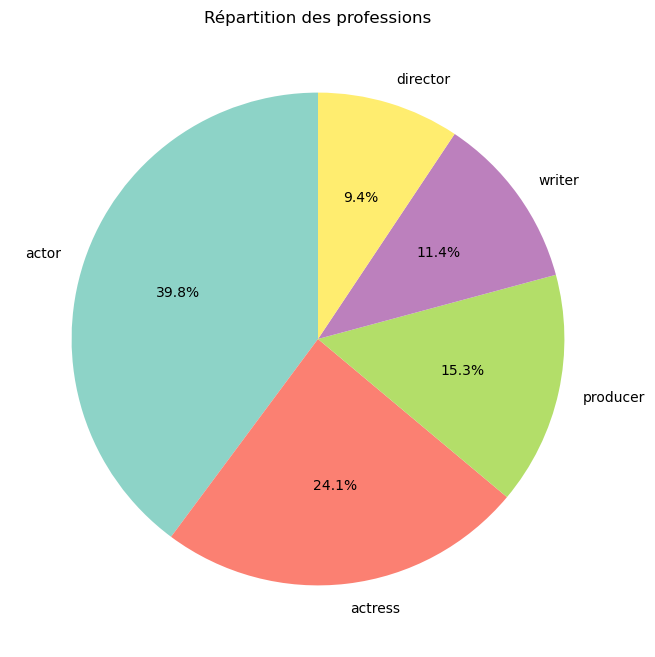

In [52]:
# Proportions des professions (pie chart)
plt.figure(figsize=(8, 8))
profession_pie = df_name_basics['primaryProfession'].value_counts()
profession_pie.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title("Répartition des professions")
plt.ylabel("")
plt.show()

**Fin de la 1ère exploration et du nettoyage**

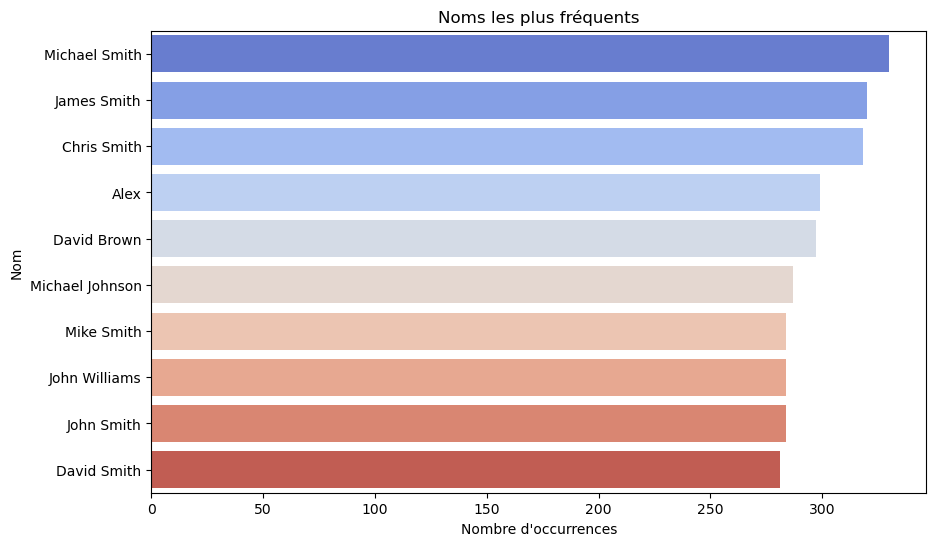

In [22]:
# 2. Analyse des noms les plus fréquents
plt.figure(figsize=(10, 6))
name_counts = df_name_basics['primaryName'].value_counts().head(10)
sns.barplot(x=name_counts.values, y=name_counts.index, hue = name_counts.index, legend = False, palette='coolwarm')
plt.title("Noms les plus fréquents")
plt.xlabel("Nombre d'occurrences")
plt.ylabel("Nom")
plt.show()

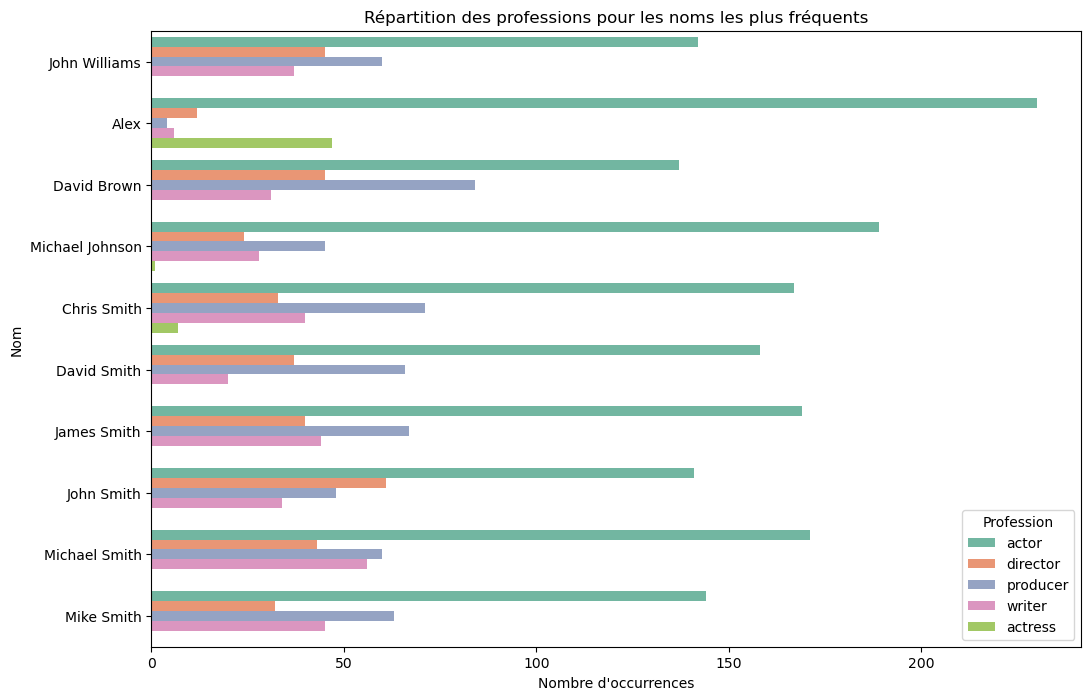

In [23]:
# 3. Répartition des professions pour les noms les plus fréquents
# Sélection des 10 noms les plus fréquents
top_names = df_name_basics['primaryName'].value_counts().head(10).index
top_names_df = df_name_basics[df_name_basics['primaryName'].isin(top_names)]

# Création d'un graphique croisé
plt.figure(figsize=(12, 8))
sns.countplot(data=top_names_df, y='primaryName', hue='primaryProfession', palette='Set2')
plt.title("Répartition des professions pour les noms les plus fréquents")
plt.xlabel("Nombre d'occurrences")
plt.ylabel("Nom")
plt.legend(title="Profession")
plt.show()